In [184]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Dropping columns and cleaning dataset

In [213]:
df = pd.read_csv("added_features.csv")
df.shape

(1000, 31)

In [186]:
genre_keys = {

    28       :   "Action",
    12       :   "Adventure",
    16       :   "Animation",
    35       :   "Comedy",
    80       :   "Crime",
    18       :   "Drama",
    10751    :   "Family",
    14       :   "Fantasy",
    36       :   "History",
    27       :   "Horror",
    10402    :   "Music",
    9648     :   "Mystery",
    10749    :   "Romance",
    878      :   "SciFi",
    53       :   "Thriller",
    10752    :   "War",
    37       :   "Western"
    
}

In [187]:
df.head()

,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes,Description,Ids,TMDB_Id,...,Horror,Music,Mystery,Romance,SciFi,TV,Thriller,War,Western,Bad Words
0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378","Over the course of several years, two convicts...","(278, [18, 80])",278.0,...,0,0,0,0,0,0,0,0,0,100
1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588","Don Vito Corleone, head of a mafia family, dec...","(238, [18, 80])",238.0,...,0,0,0,0,0,0,0,0,0,20
2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087",When the menace known as the Joker wreaks havo...,"(155, [18, 28, 80, 53])",155.0,...,0,0,0,0,0,0,1,0,0,5
3,Schindler's List,1993,195,9.0,95.0,96.9,"13,97,886","In German-occupied Poland during World War II,...","(424, [18, 36, 10752])",424.0,...,0,0,0,0,0,0,0,1,0,16
4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211",The jury in a New York City murder trial is fr...,"(389, [18])",389.0,...,0,0,0,0,0,0,0,0,0,1


In [188]:
df = df.drop(columns=['Movie Name', 'Description', 'Ids', 'TMDB_Id', 'TMDB_Genre'])
df['Gross'].loc[df['Gross'] == '#222'] = None ## quick data cleaning

/var/folders/9s/wjp86gfn3yl56f5kv0hr0_fr0000gn/T/ipykernel_56605/3012199751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross'].loc[df['Gross'] == '#222'] = None ## quick data cleaning


In [189]:
df.head()

,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes,Action,Adventure,Animation,Comedy,...,Horror,Music,Mystery,Romance,SciFi,TV,Thriller,War,Western,Bad Words
0,1994,142,9.3,82.0,28.34,"27,77,378",0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
1,1972,175,9.2,100.0,134.97,"19,33,588",0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
2,2008,152,9.0,84.0,534.86,"27,54,087",1,0,0,0,...,0,0,0,0,0,0,1,0,0,5
3,1993,195,9.0,95.0,96.9,"13,97,886",0,0,0,0,...,0,0,0,0,0,0,0,1,0,16
4,1957,96,9.0,97.0,4.36,"8,24,211",0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [190]:
def handleVotes(value):
    no_commas = value.replace(',', '')
    return int(no_commas)

df['Votes'] = df['Votes'].apply(handleVotes)

In [191]:
df.head()

,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes,Action,Adventure,Animation,Comedy,...,Horror,Music,Mystery,Romance,SciFi,TV,Thriller,War,Western,Bad Words
0,1994,142,9.3,82.0,28.34,2777378,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
1,1972,175,9.2,100.0,134.97,1933588,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
2,2008,152,9.0,84.0,534.86,2754087,1,0,0,0,...,0,0,0,0,0,0,1,0,0,5
3,1993,195,9.0,95.0,96.9,1397886,0,0,0,0,...,0,0,0,0,0,0,0,1,0,16
4,1957,96,9.0,97.0,4.36,824211,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [192]:
df = df.dropna()

In [193]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Creating PCA

In [194]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

### It's hard to tell what exactly these features mean

In [195]:
pca.components_

array([[ 0.13371998, -0.05923974,  0.08053167,  0.06778032,  0.39284993,
         0.29172822,  0.24940756,  0.39136994,  0.29687925,  0.07191096,
        -0.10849388, -0.00636575, -0.36140282,  0.30024035,  0.25391965,
        -0.12671199, -0.01641303, -0.04306929, -0.07552717, -0.11680265,
         0.26187108, -0.02201853, -0.04875106, -0.09404572, -0.00695924,
        -0.06715116],
       [ 0.11886689,  0.32095128,  0.23424432,  0.03940662,  0.18874962,
         0.36119422,  0.26436353,  0.03775516, -0.30101319, -0.30852447,
         0.21024293, -0.01100255,  0.05120461, -0.33562088, -0.21251069,
         0.06338621,  0.00144133, -0.08361866,  0.12251624, -0.18082774,
         0.1949284 ,  0.00566234,  0.25744174,  0.0493268 ,  0.01982638,
         0.18066668]])

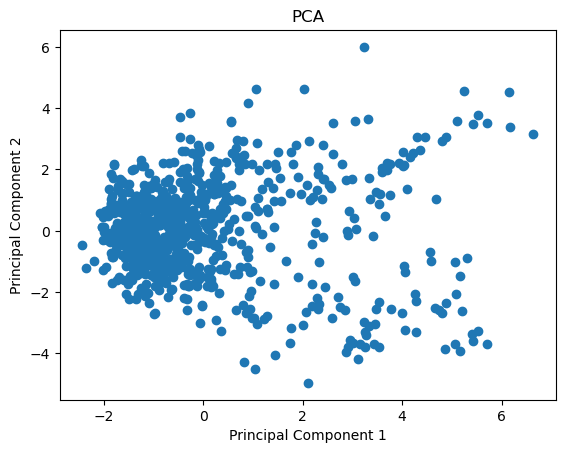

In [196]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

## Try again but now only with the genres

In [197]:
df = df.drop(columns = ['Year of Release', 'Watch Time', 'Movie Rating', 'Gross', 'Votes', 'Metascore of movie', 'Bad Words', 'Documentary'])

In [198]:
df.head()

,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,SciFi,TV,Thriller,War,Western
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [199]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

In [200]:
components = pca.components_
components

array([[ 0.15631977,  0.38145513,  0.42030039,  0.19219338, -0.17859159,
        -0.39945847,  0.43266079,  0.35819687, -0.14922038, -0.01684801,
        -0.01768766, -0.13070824, -0.06326649,  0.17333891, -0.02275707,
        -0.14906585, -0.1129893 ,  0.00090726],
       [ 0.38251729,  0.15774758, -0.10732005, -0.24439759,  0.26878167,
        -0.29310448, -0.16706026, -0.09634254, -0.16012877,  0.14045684,
        -0.17522   ,  0.27415235, -0.29328037,  0.31401221,  0.03919138,
         0.45167701, -0.14383332,  0.01093363]])

## Did I exctract the rating ??? (PG, G, R etc)

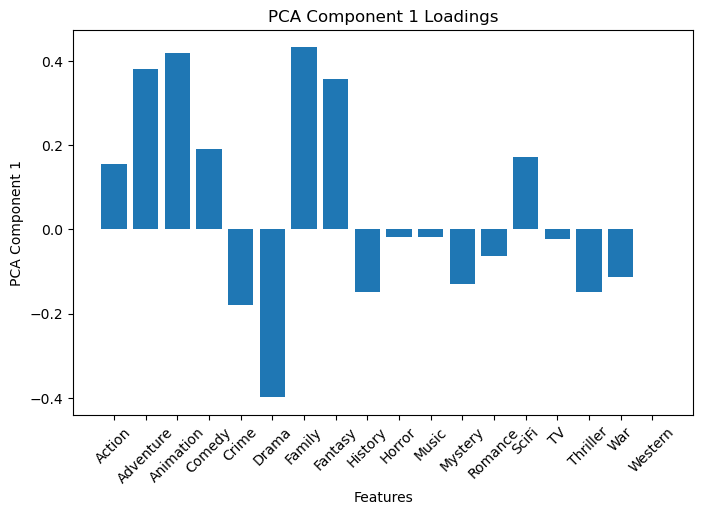

In [211]:
plt.figure(figsize=(8, 5))
plt.bar(df.columns, components[0])
plt.xlabel('Features')
plt.ylabel('PCA Component 1')
plt.title('PCA Component 1 Loadings')
plt.xticks(rotation=45)
plt.show()

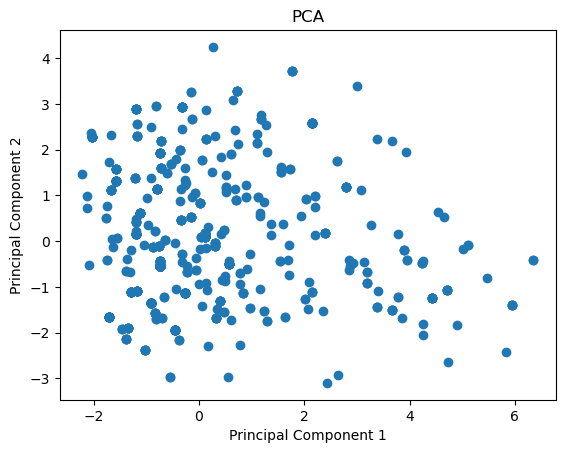

In [204]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

In [205]:
df.corr()

,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,SciFi,TV,Thriller,War,Western
Action,1.000000,0.342588,-0.007053,-0.117013,0.067510,-0.312706,-0.072844,0.009922,-0.040724,-0.057031,-0.064070,-0.081920,-0.176443,0.298327,-0.022961,0.143297,0.021531,-0.035532
Adventure,0.342588,1.000000,0.200834,0.020847,-0.179205,-0.374077,0.215951,0.267242,-0.024149,-0.065795,-0.056668,-0.124275,-0.123237,0.279696,-0.021177,-0.085308,-0.022252,0.035384
Animation,-0.007053,0.200834,1.000000,0.135989,-0.120547,-0.288886,0.599889,0.318844,-0.075675,-0.058247,-0.027655,-0.064557,-0.070743,0.032491,-0.014785,-0.124914,-0.052489,-0.048464
Comedy,-0.117013,0.020847,0.135989,1.000000,-0.066985,-0.171242,0.234313,0.072281,-0.137118,-0.038350,0.061902,-0.123488,0.118672,-0.122152,-0.025617,-0.210088,-0.103633,-0.065376
Crime,0.067510,-0.179205,-0.120547,-0.066985,1.000000,0.007749,-0.130523,-0.119715,-0.098214,-0.074560,-0.064827,0.176309,-0.118651,-0.154810,-0.023147,0.336094,-0.133771,-0.056107
Drama,-0.312706,-0.374077,-0.288886,-0.171242,0.007749,1.000000,-0.284655,-0.251797,0.195898,-0.162968,0.050029,-0.052400,0.145120,-0.264679,-0.017164,-0.106097,0.132856,-0.080547
Family,-0.072844,0.215951,0.599889,0.234313,-0.130523,-0.284655,1.000000,0.352217,-0.090551,-0.057792,0.023965,-0.094037,-0.045424,-0.024647,-0.014670,-0.145717,-0.084779,-0.048085
Fantasy,0.009922,0.267242,0.318844,0.072281,-0.119715,-0.251797,0.352217,1.000000,-0.096845,-0.039700,-0.007961,-0.057404,0.031583,-0.035426,-0.015689,-0.134941,-0.074978,-0.051427
History,-0.040724,-0.024149,-0.075675,-0.137118,-0.098214,0.195898,-0.090551,-0.096845,1.000000,-0.058247,0.048404,-0.064557,-0.070743,-0.098886,-0.014785,-0.081012,0.326529,-0.048464
Horror,-0.057031,-0.065795,-0.058247,-0.038350,-0.074560,-0.162968,-0.057792,-0.039700,-0.058247,1.000000,-0.033831,0.074523,-0.083053,0.023842,-0.009436,0.102403,-0.054534,-0.030931


Text(0.5, 1.0, 'Correlation Heatmap')

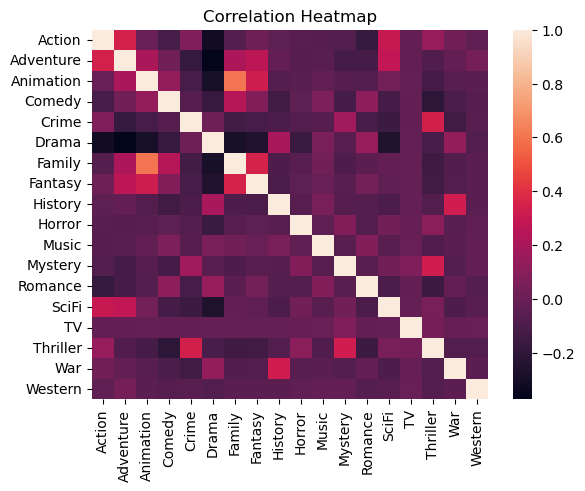

In [206]:
sns.heatmap(df.corr())
plt.title("Correlation Heatmap")